In [1]:
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from helpers import *
%load_ext autoreload
%autoreload 2

In [4]:
# defining global constants
E_L = -70 * b2.mV # resting membrane potential
# defining constants for soma
TAU_s = 16 * b2.ms # somatic membrane time scale
TAU_w_s = 100 * b2.ms # somatic adaptation time scale
C_s = 370 * b2.pF # somatic membrane capacitance
E_th = -50 * b2.mV # spike threshold
b_w_s = -200 * b2.pA # used to update w after spike event
T_ref = 3*b2.ms # refractory period

# defining dendritic constants
TAU_d = 8 * b2.ms # dendritic membrane time scale
TAU_w_d = 30 * b2.ms # dendritic adaptation time scale
C_d = 170 * b2.pF # dendritic membrane capacitance
E_d = -38 * b2.mV
D_d = 6 * b2.mV
a_w_d = -13 * b2.nS
g_d = 1200 * b2.pA
g_s = 1300 * b2.pA
c_d = 2600 * b2.pA

# Defining noise constants
mu_s = 70 * b2.pA
mu_d = -270 * b2.pA
TAU_ou = 2 * b2.ms
sigma_ou = 450 * b2.pA

## Dephasing

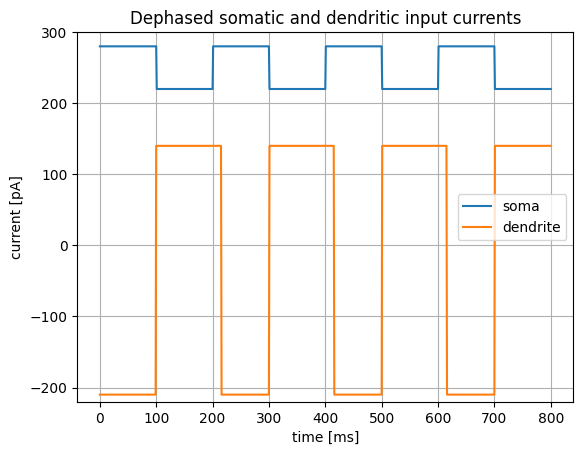

In [5]:
current_alt_dendrite_dephased = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=100)
current_alt_soma_dephased = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_dephased, current2=current_alt_dendrite_dephased, label1="soma", label2="dendrite", title= "Dephased somatic and dendritic input currents", savefig=False)

In [6]:
state_monitor_dephased, spike_monitor_dephased = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou,
                                                                                 mu_s= mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b= b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_dephased, I_d_ext = current_alt_dendrite_dephased, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d,T_refractory = T_ref, nb_neurons = 4000, simulation_time=800*b2.ms)

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.09s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


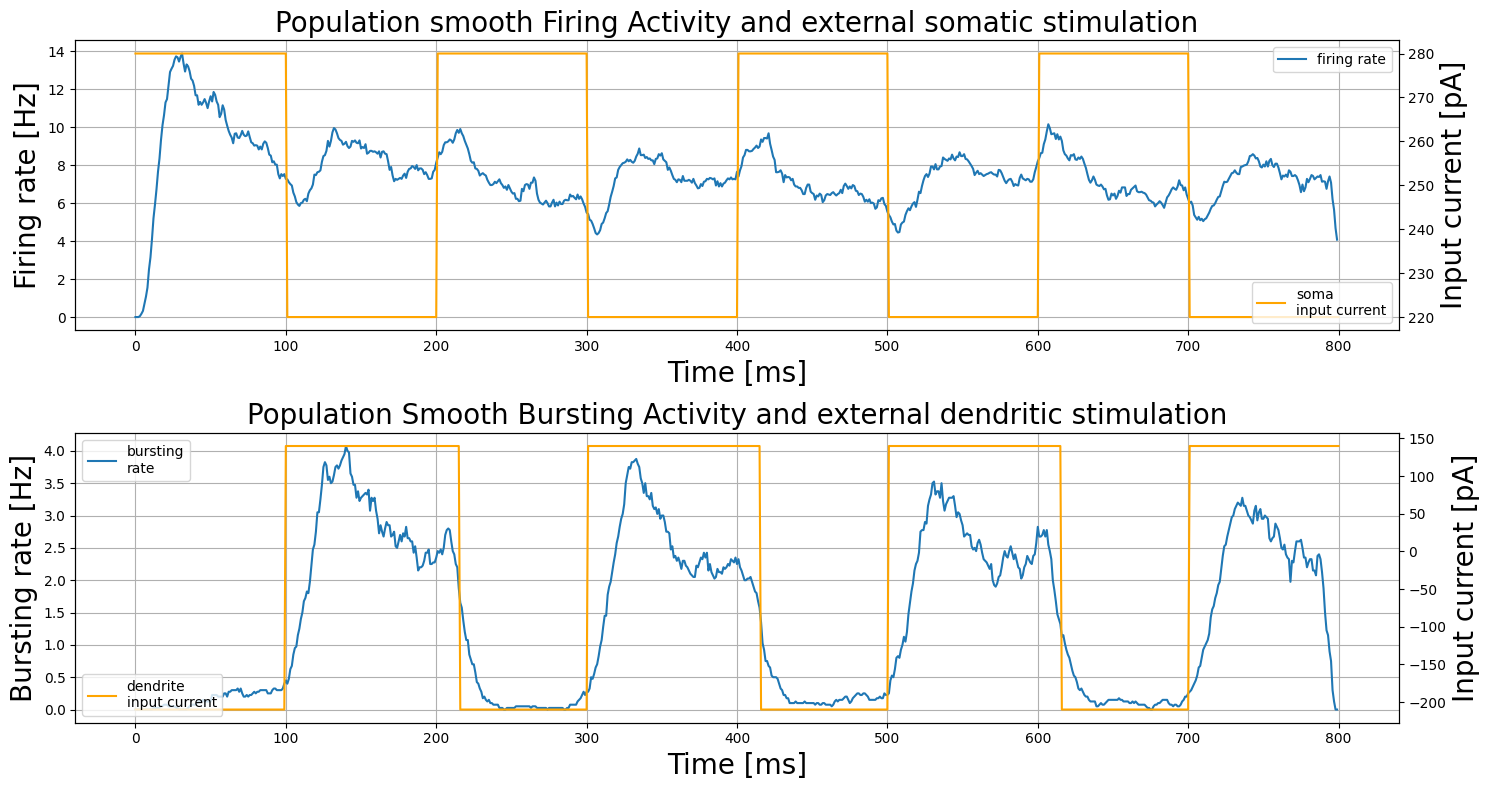

In [13]:
firing_rate_dephased, single_spike_rate_dephased, bursting_rate_dephased = compute_firing_and_burst_rate(spike_monitor_dephased)
plot_external_inputs_and_rates(firing_rate_dephased, bursting_rate_dephased, current_alt_soma_dephased, current_alt_dendrite_dephased, title= 'dephased_current_plot1', savefig=False)

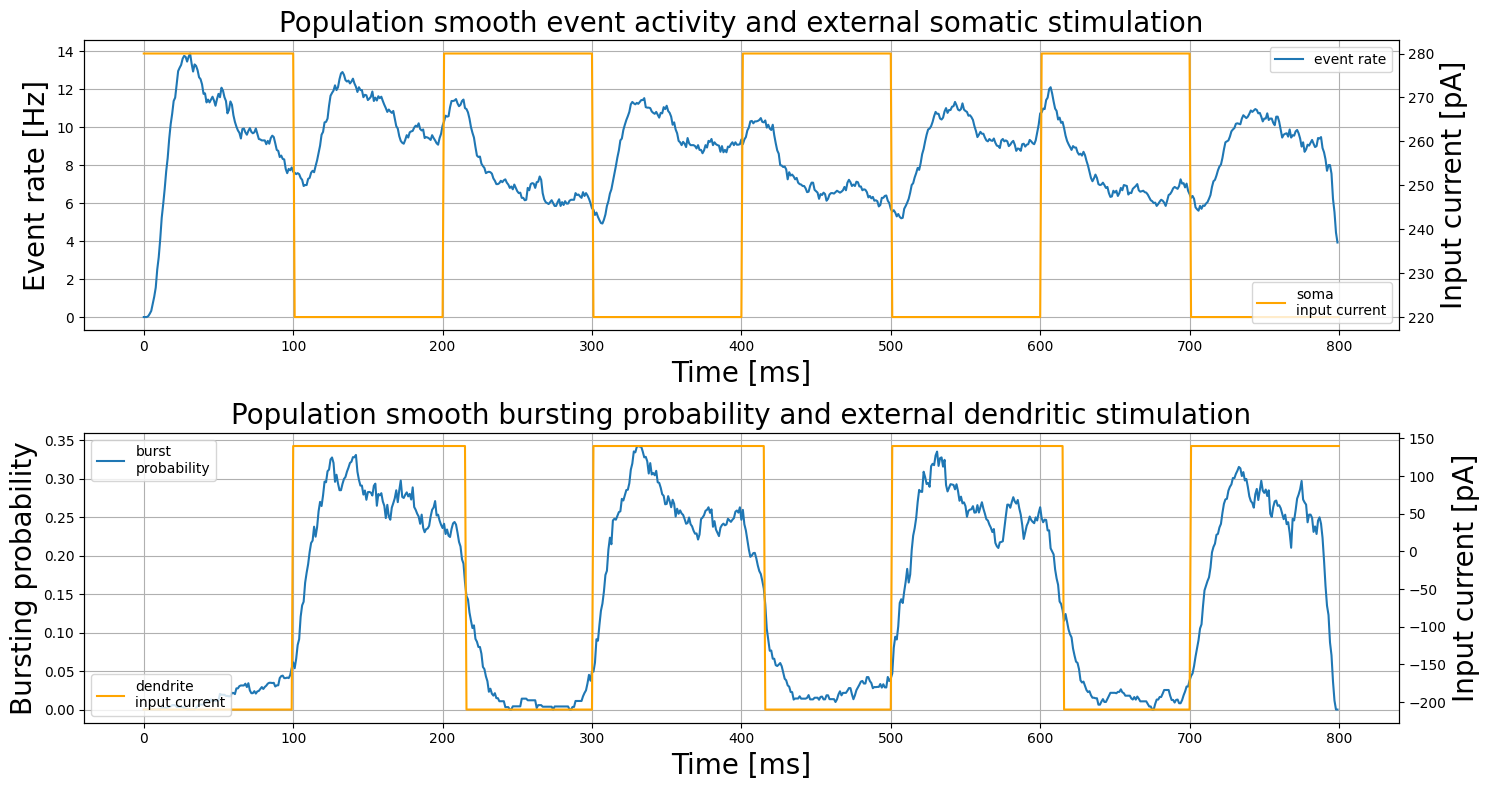

In [14]:
event_rate_dephased = compute_event_rate(bursting_rate_dephased, single_spike_rate_dephased)
burst_proba_dephased = compute_burst_proba(bursting_rate_dephased, event_rate_dephased)
plot_external_inputs_and_rates(event_rate_dephased, burst_proba_dephased, current_alt_soma_dephased, current_alt_dendrite_dephased, title= 'dephased_currents_plot2', isBurstProba=True, savefig=False)

## Lower soma current

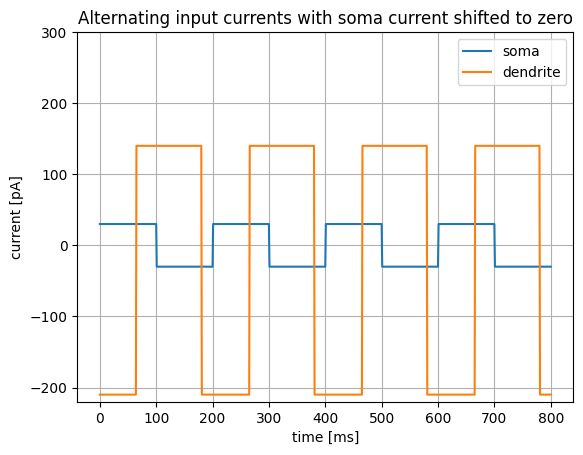

In [9]:
current_alt_dendrite = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_soma_down = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=30*b2.pA, low_current=-30*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_down, current2=current_alt_dendrite, label1="soma", label2="dendrite", title= "Alternating input currents with soma current shifted to zero", savefig=False)

In [10]:
state_monitor_soma_down, spike_monitor_soma_down = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou, mu_s = mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b= b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_down, I_d_ext = current_alt_dendrite, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d,T_refractory = T_ref, nb_neurons = 4000, simulation_time=800*b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
WARNING    neurongroup_1's variable 't_p' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


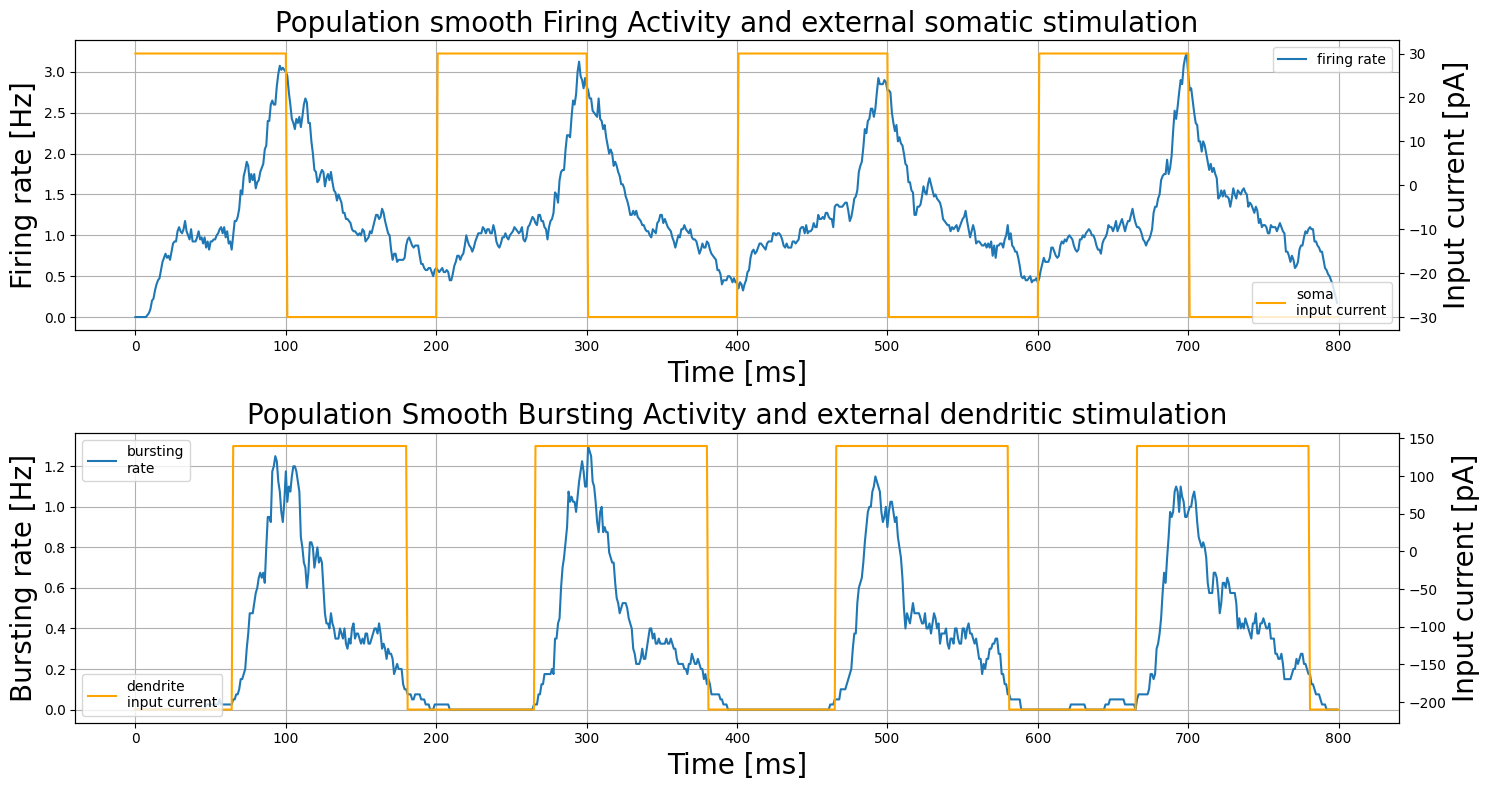

In [11]:
firing_rate_soma_down, single_spike_rate_down, bursting_rate_soma_down = compute_firing_and_burst_rate(spike_monitor_soma_down)
plot_external_inputs_and_rates(firing_rate_soma_down, bursting_rate_soma_down, current_alt_soma_down
                               , current_alt_dendrite, title= 'dephased_current_plot1', savefig=False)

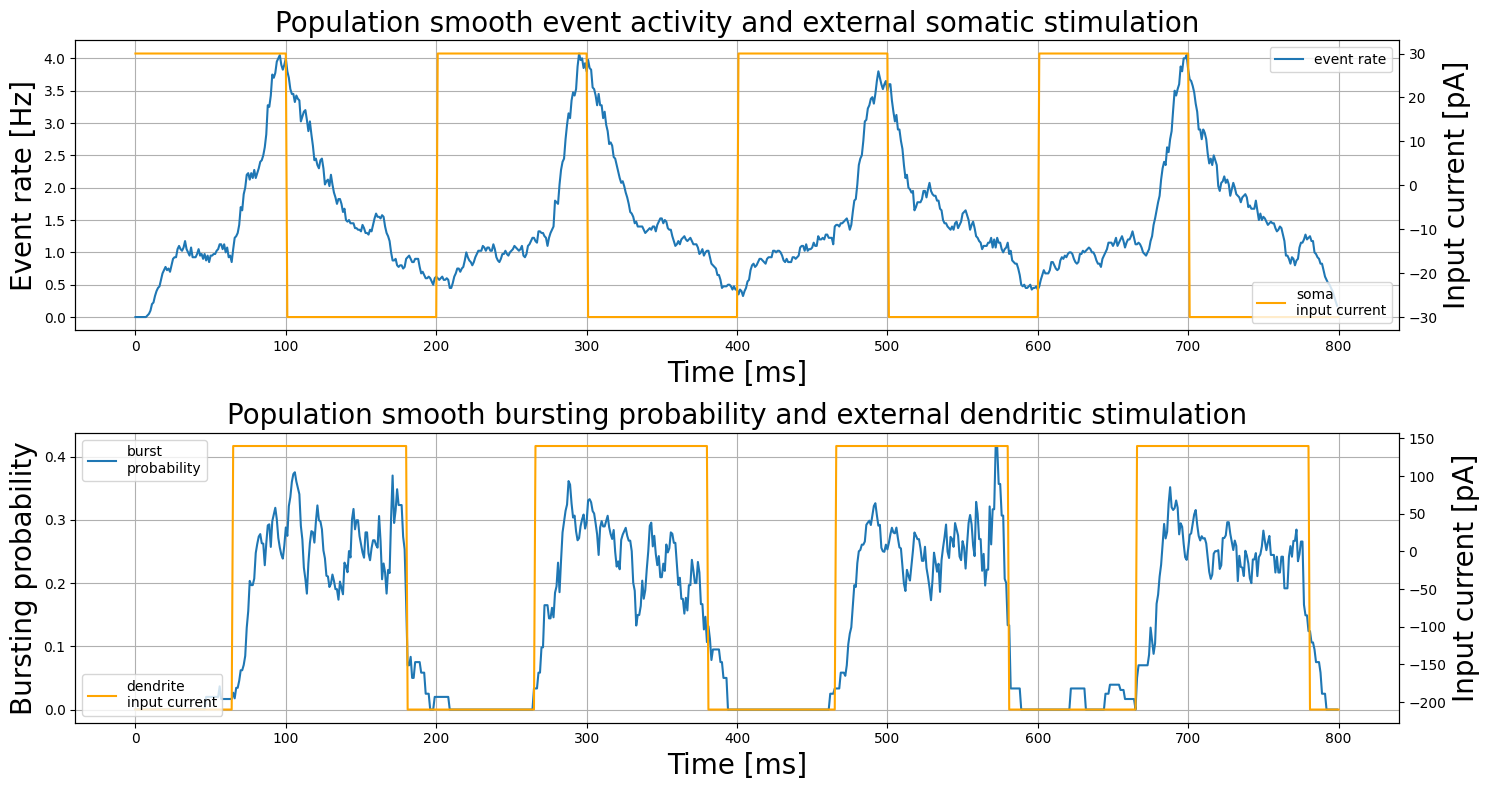

In [12]:
event_rate_soma_down = compute_event_rate(bursting_rate_soma_down, single_spike_rate_down)
burst_proba_soma_down = compute_burst_proba(bursting_rate_soma_down, event_rate_soma_down)
plot_external_inputs_and_rates(event_rate_soma_down, burst_proba_soma_down, current_alt_soma_down, current_alt_dendrite, title= 'dephased_currents_plot2', isBurstProba=True, savefig=False)

# Shorter period for both current

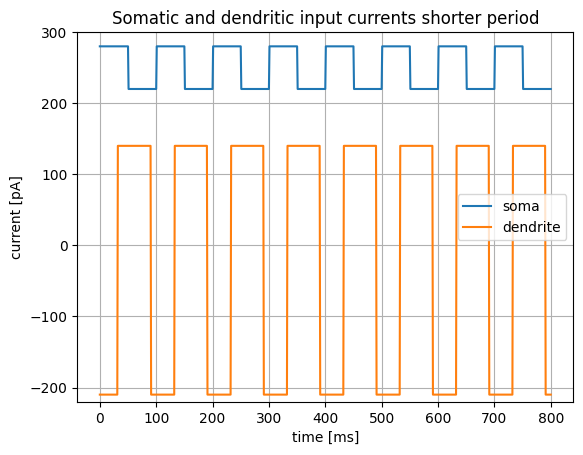

In [22]:
current_alt_dendrite_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=42, t_up=58, phase_lag=32)
current_alt_soma_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=50, t_up=50)
plot_alternating_currents(current1=current_alt_soma_short, current2=current_alt_dendrite_short, label1="soma", label2="dendrite", title= "Somatic and dendritic input currents shorter period", savefig=False)

In [23]:
state_monitor_short, spike_monitor_short = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou,
mu_s = mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b = b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_short, I_d_ext = current_alt_dendrite_short, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d, T_refractory = T_ref, nb_neurons = 4000, simulation_time = 800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.03s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


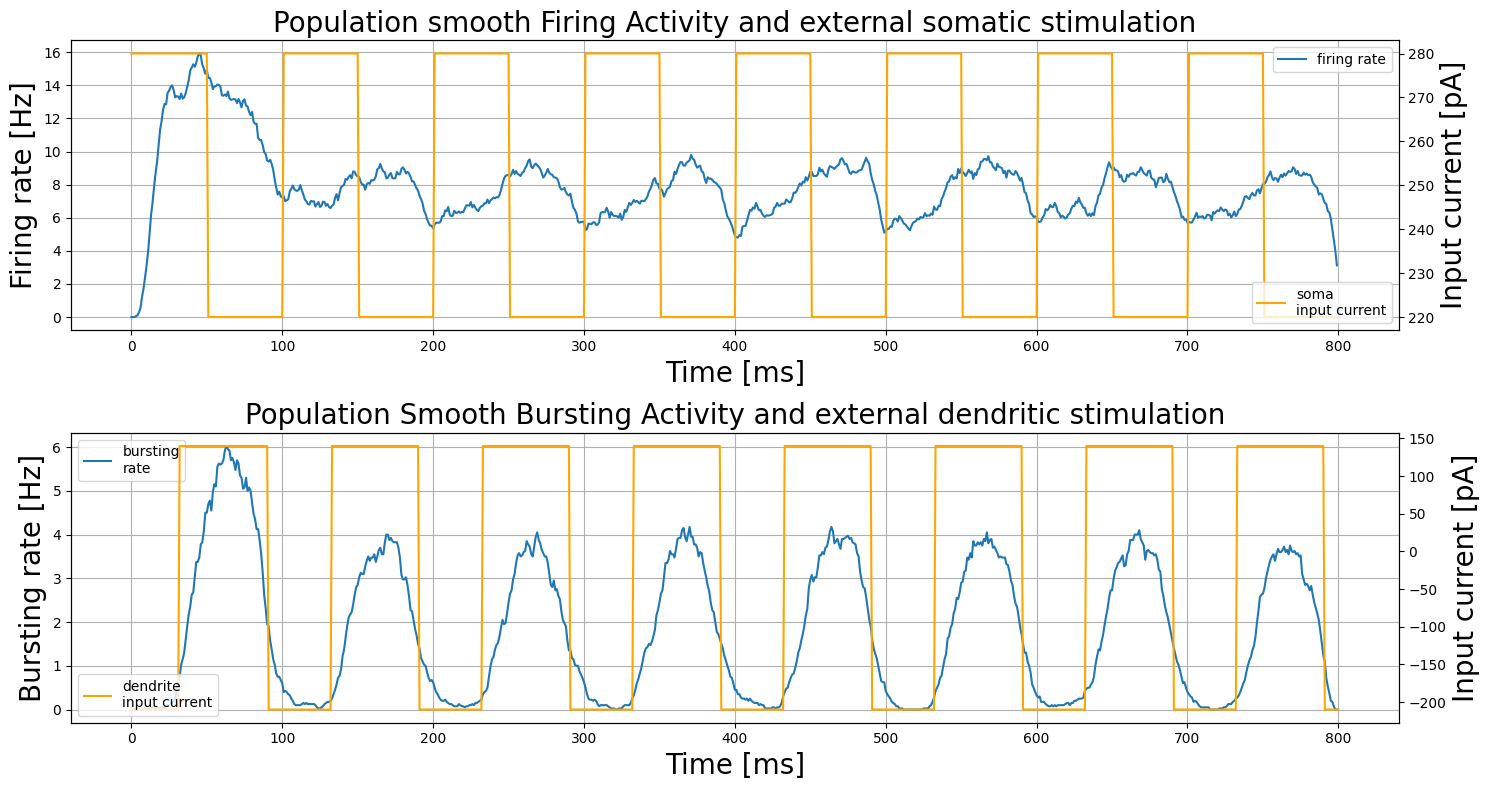

In [24]:
firing_rate_short, single_spike_rate_short, bursting_rate_short = compute_firing_and_burst_rate(spike_monitor_short)
plot_external_inputs_and_rates(firing_rate_short, bursting_rate_short, current_alt_soma_short
                               , current_alt_dendrite_short, title= 'short_period_current_plot1', savefig=False)

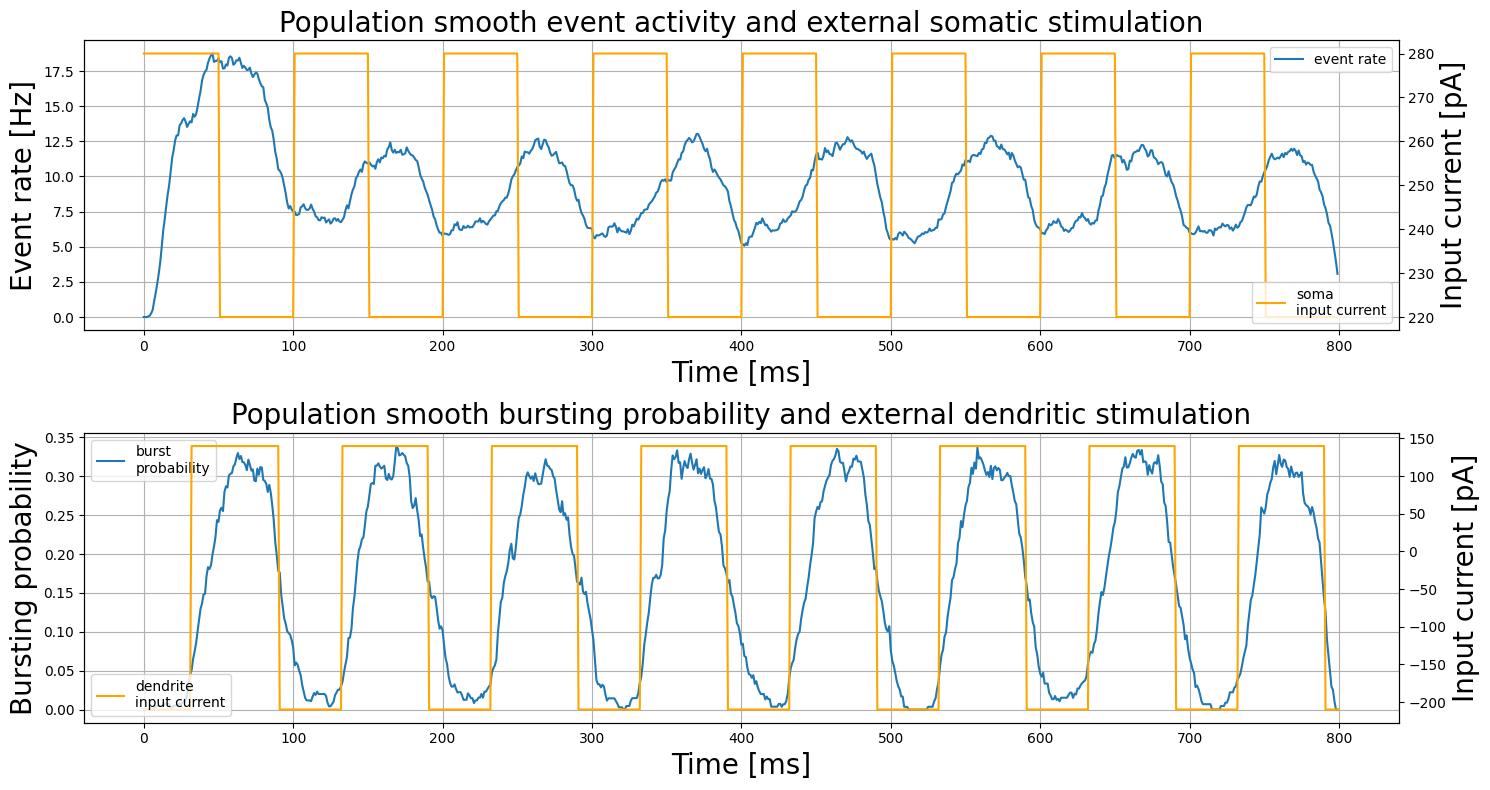

In [25]:
event_rate_short = compute_event_rate(bursting_rate_short, single_spike_rate_short)
burst_proba_short = compute_burst_proba(bursting_rate_short, event_rate_short)
plot_external_inputs_and_rates(event_rate_short, burst_proba_short, current_alt_soma_short, current_alt_dendrite_short, title= 'short_period_currents_plot2', isBurstProba=True, savefig=False)

# Different periods


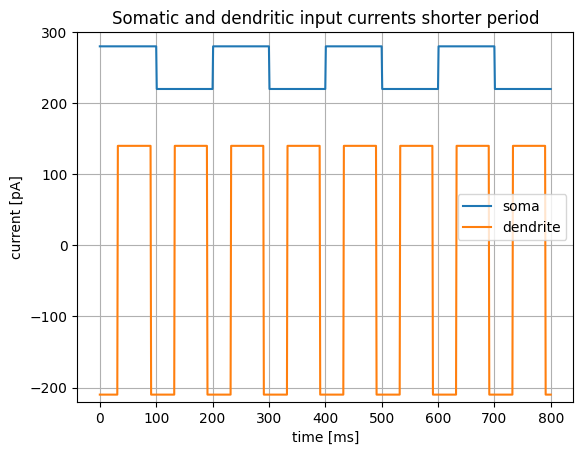

In [38]:
current_alt_dendrite = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_dendrite_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=42, t_up=58, phase_lag=32)
current_alt_soma_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=50, t_up=50)
current_alt_soma = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma, current2=current_alt_dendrite_short, label1="soma", label2="dendrite", title= "Somatic and dendritic input currents shorter period", savefig=False)

In [42]:
state_monitor_2periods, spike_monitor_2periods = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou,
mu_s = mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b = b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma, I_d_ext = current_alt_dendrite_short, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d, T_refractory = T_ref, nb_neurons = 4000, simulation_time = 800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.04s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


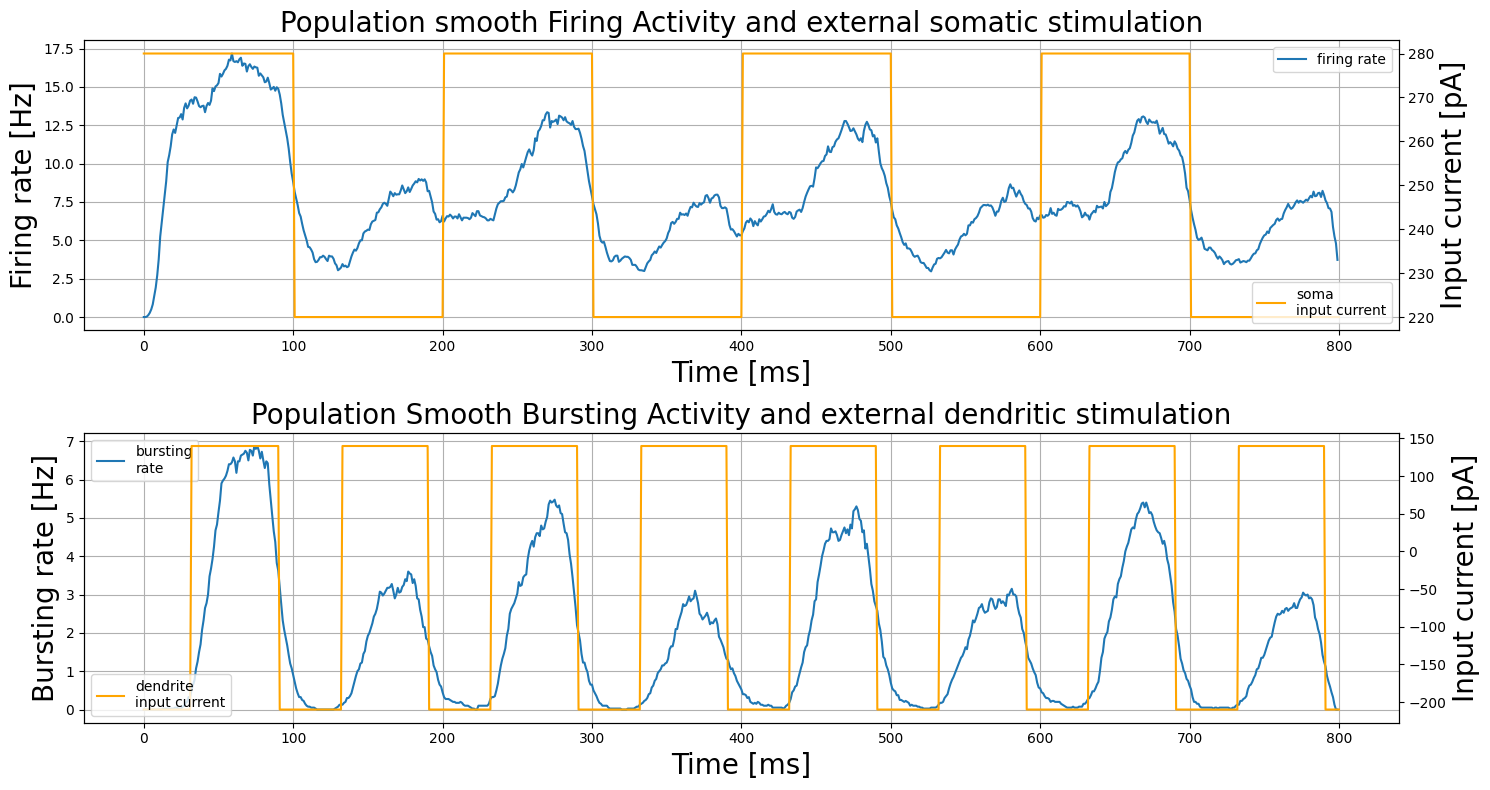

In [43]:
firing_rate_2periods, single_spike_rate_2periods, bursting_rate_2periods = compute_firing_and_burst_rate(spike_monitor_2periods)
plot_external_inputs_and_rates(firing_rate_2periods, bursting_rate_2periods, current_alt_soma
                               , current_alt_dendrite_short, title= 'short_period_current_plot1', savefig=False)

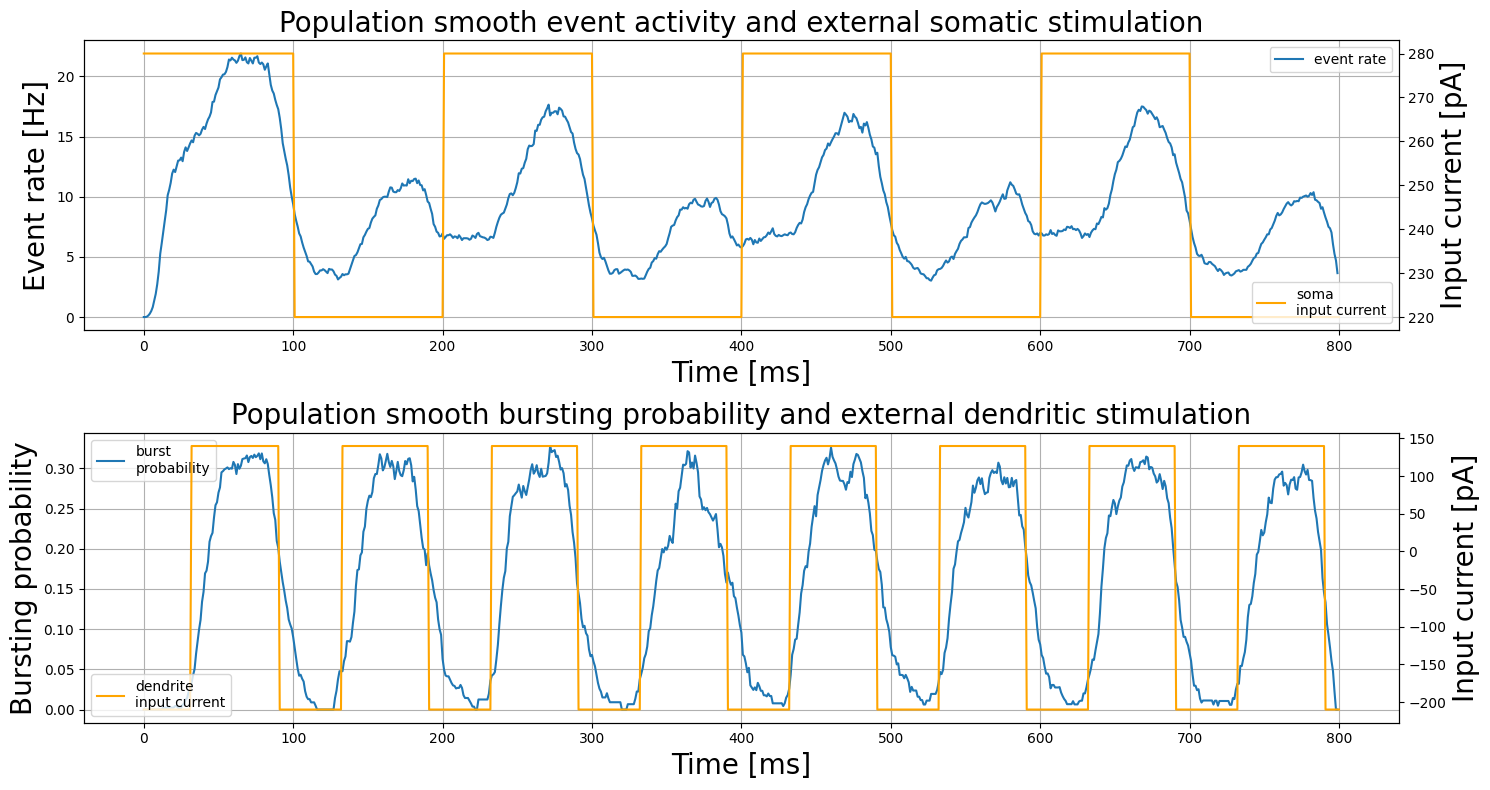

In [44]:
event_rate_2periods = compute_event_rate(bursting_rate_2periods, single_spike_rate_2periods)
burst_proba_2periods = compute_burst_proba(bursting_rate_2periods, event_rate_2periods)
plot_external_inputs_and_rates(event_rate_2periods, burst_proba_2periods, current_alt_soma, current_alt_dendrite_short, title= 'short_period_currents_plot2', isBurstProba=True, savefig=False)

# Small dendrite current

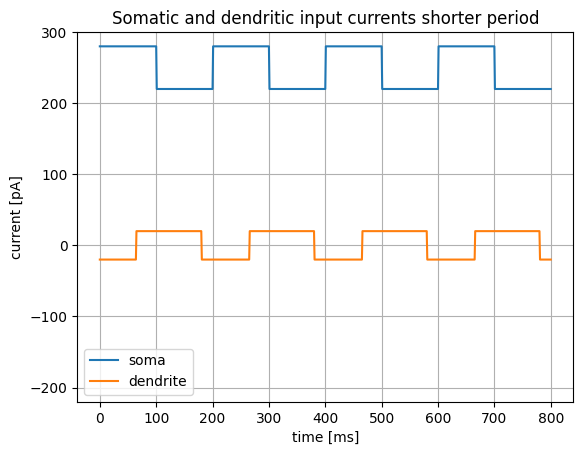

In [46]:
current_alt_dendrite_low = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-20*b2.pA, high_current=20*b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_soma = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma, current2=current_alt_dendrite_low, label1="soma", label2="dendrite", title= "Somatic and dendritic input currents shorter period", savefig=False)

In [49]:
state_monitor_low_d, spike_monitor_low_d = simulate_pyramidal_neuron_noisy(tau_s=TAU_s, tau_d=TAU_d, tau_ou=TAU_ou,
                                                                           mu_s=mu_s, mu_d=mu_d, sigma_ou=sigma_ou,
                                                                           C_s=C_s, C_d=C_d, v_rest=E_L, b=b_w_s,
                                                                           v_spike=E_th, tau_w_s=TAU_w_s,
                                                                           tau_w_d=TAU_w_d, I_s_ext=current_alt_soma,
                                                                           I_d_ext=current_alt_dendrite_low, a=a_w_d,
                                                                           E_d=E_d, D_d=D_d, g_d=g_d, g_s=g_s, c_d=c_d,
                                                                           T_refractory=T_ref, nb_neurons=4000,
                                                                           simulation_time=800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


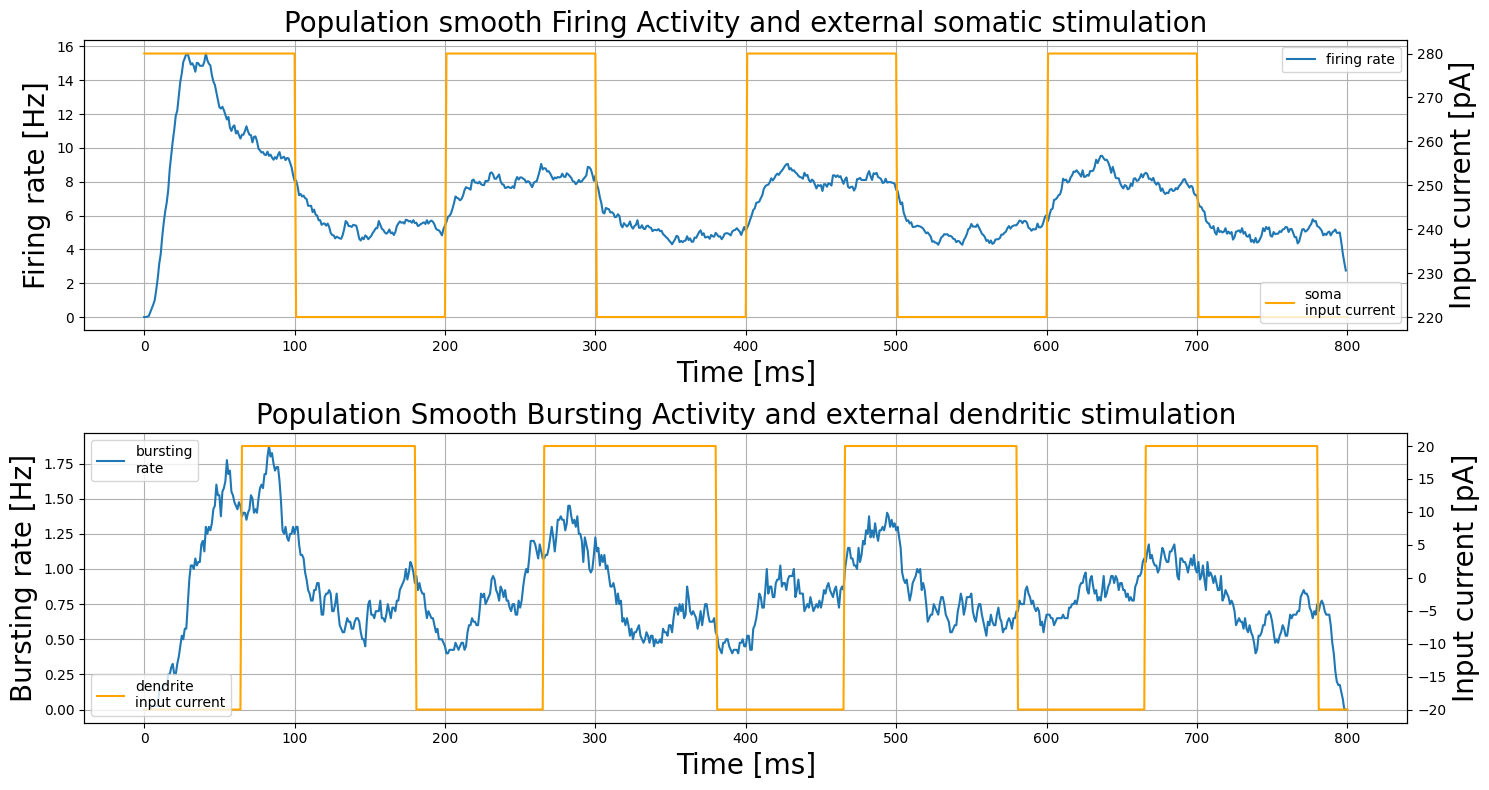

In [51]:
firing_rate_low_d, single_spike_rate_low_d, bursting_rate_low_d = compute_firing_and_burst_rate(spike_monitor_low_d)
plot_external_inputs_and_rates(firing_rate_low_d, bursting_rate_low_d, current_alt_soma
                               , current_alt_dendrite_low, title= 'short_period_current_plot1', savefig=False)

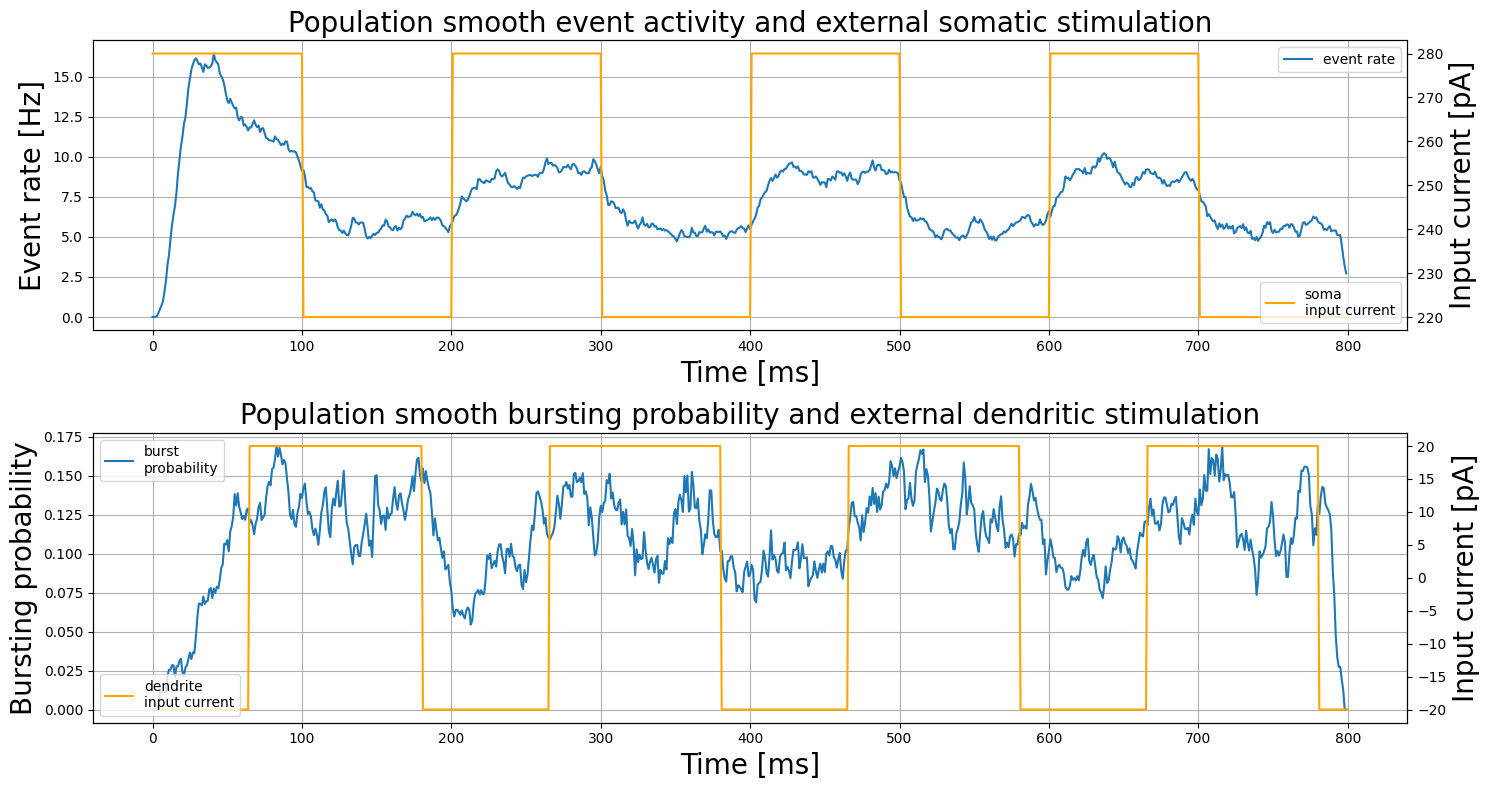

In [52]:
event_rate_low_d = compute_event_rate(bursting_rate_low_d, single_spike_rate_low_d)
burst_proba_low_d = compute_burst_proba(bursting_rate_low_d, event_rate_low_d)
plot_external_inputs_and_rates(event_rate_low_d, burst_proba_low_d, current_alt_soma, current_alt_dendrite_low, title= 'short_period_currents_plot2', isBurstProba=True, savefig=False)

# Low dendrite current, high soma

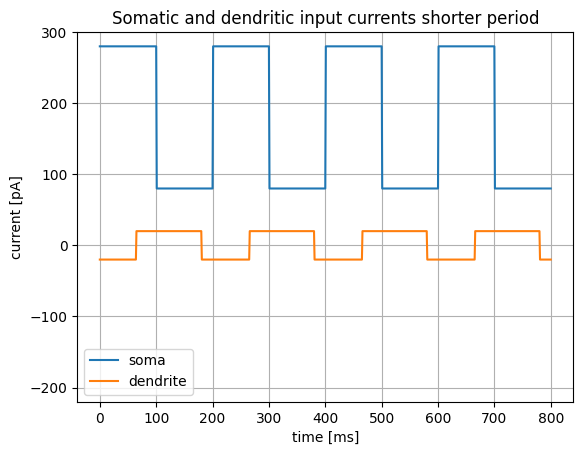

In [55]:
current_alt_dendrite_low = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-20 * b2.pA,
                                                   high_current=20 * b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_soma_high = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280 * b2.pA,
                                           low_current=80 * b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_high, current2=current_alt_dendrite_low, label1="soma",
                          label2="dendrite", title="Somatic and dendritic input currents shorter period", savefig=False)

In [56]:
state_monitor_low_d, spike_monitor_low_d = simulate_pyramidal_neuron_noisy(tau_s=TAU_s, tau_d=TAU_d, tau_ou=TAU_ou,
                                                                           mu_s=mu_s, mu_d=mu_d, sigma_ou=sigma_ou,
                                                                           C_s=C_s, C_d=C_d, v_rest=E_L, b=b_w_s,
                                                                           v_spike=E_th, tau_w_s=TAU_w_s,
                                                                           tau_w_d=TAU_w_d, I_s_ext=current_alt_soma_high,
                                                                           I_d_ext=current_alt_dendrite_low, a=a_w_d,
                                                                           E_d=E_d, D_d=D_d, g_d=g_d, g_s=g_s, c_d=c_d,
                                                                           T_refractory=T_ref, nb_neurons=4000,
                                                                           simulation_time=800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_5', using method 'euler' (took 0.03s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
WARNING    neurongroup_5's variable 't_p' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


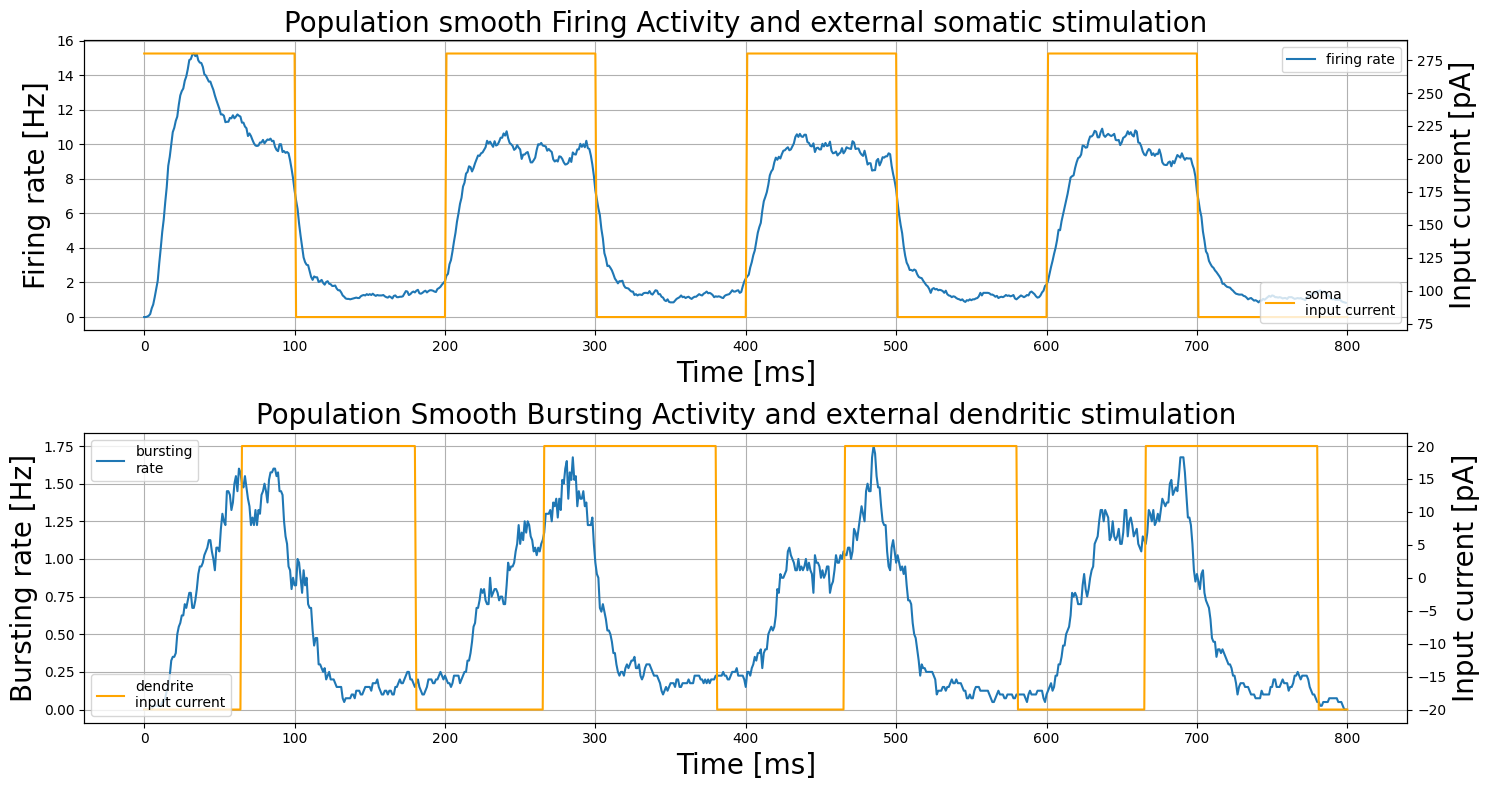

In [57]:
firing_rate_low_d, single_spike_rate_low_d, bursting_rate_low_d = compute_firing_and_burst_rate(spike_monitor_low_d)
plot_external_inputs_and_rates(firing_rate_low_d, bursting_rate_low_d, current_alt_soma_high
                               , current_alt_dendrite_low, title= 'short_period_current_plot1', savefig=False)

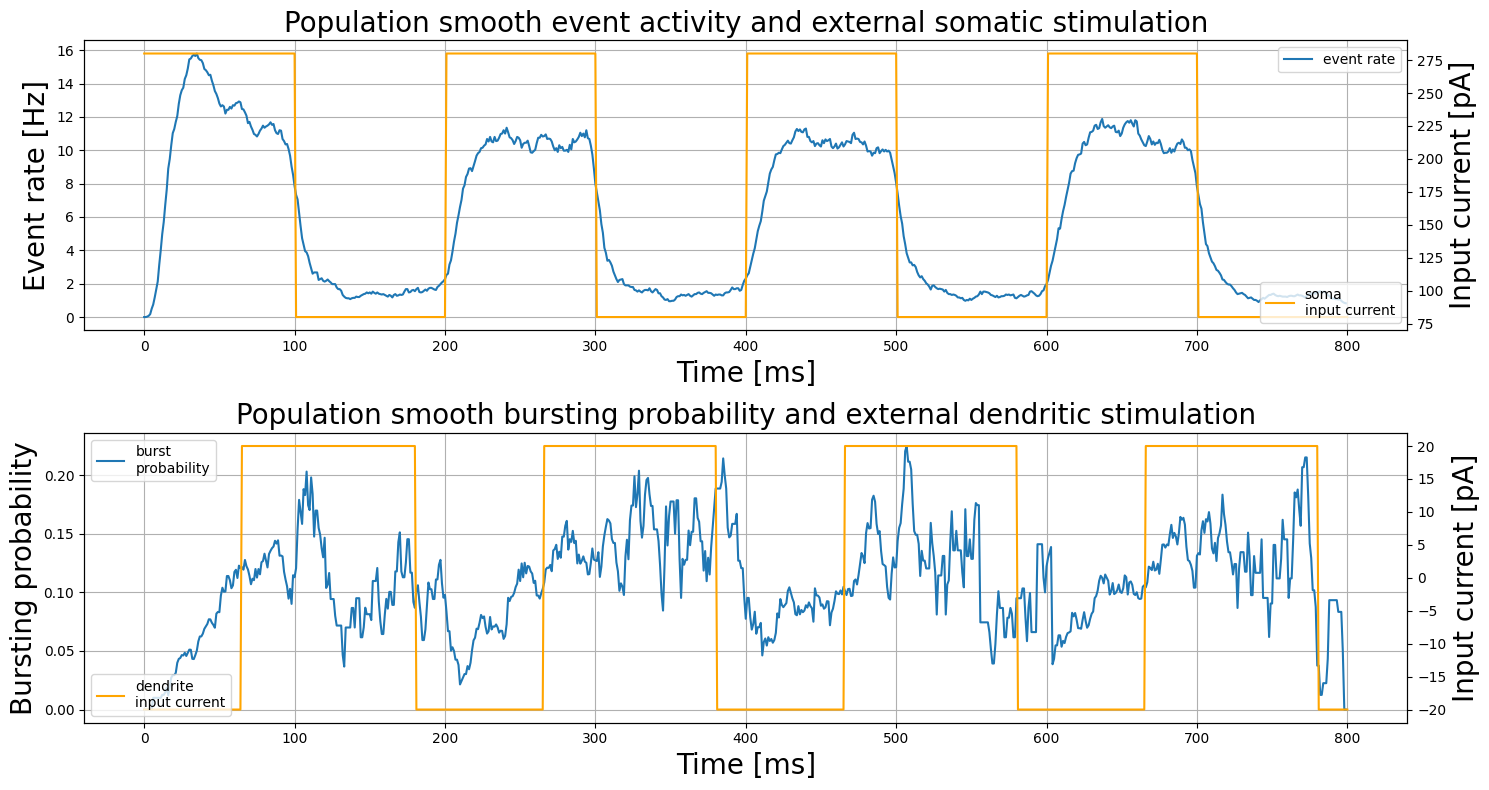

In [58]:
event_rate_low_d = compute_event_rate(bursting_rate_low_d, single_spike_rate_low_d)
burst_proba_low_d = compute_burst_proba(bursting_rate_low_d, event_rate_low_d)
plot_external_inputs_and_rates(event_rate_low_d, burst_proba_low_d, current_alt_soma_high, current_alt_dendrite_low, title= 'short_period_currents_plot2', isBurstProba=True, savefig=False)